In [38]:
# 数値計算、ビジュアライゼーションライブラリの読み込み
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
iris_dataset = load_iris()


In [39]:
# irisデータセットのキーの確認
print(iris_dataset.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [40]:
# irisデータセットの品種の確認
print(iris_dataset['target_names'])

['setosa' 'versicolor' 'virginica']


In [41]:
# irisデータセットの特微量の確認
print(iris_dataset['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [42]:
# PandasのDataFrameで特微量を表示
df = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [49]:
# 主成分分析する
pca = PCA()
feature = pca.fit(df)

# 分析結果を元にデータセットを主成分に変換する
transformed = pca.fit_transform(features)

In [51]:
#主成分得点
pd.DataFrame(transformed, columns=["PC{}".format(x + 1) for x in range(len(df.columns))]).head()

,PC1,PC2,PC3,PC4
0,-2.684126,0.319397,-0.027915,-0.002262
1,-2.714142,-0.177001,-0.210464,-0.099027
2,-2.888991,-0.144949,0.017900,-0.019968
3,-2.745343,-0.318299,0.031559,0.075576
4,-2.728717,0.326755,0.090079,0.061259


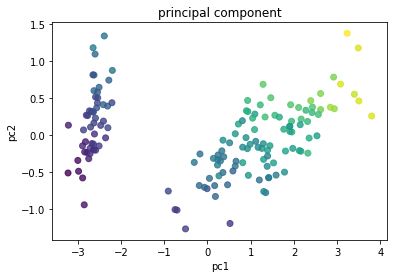

In [53]:
# 第一主成分と第二主成分でプロットする
targets = iris_dataset['target']
#for label in np.unique(targets):
#    plt.scatter(transformed[targets == label, 0],
#                transformed[targets == label, 1])

plt.scatter(transformed[:, 0], transformed[:, 1], alpha=0.8, c=list(df.iloc[:, 0]))
    
# グラフを表示する
plt.title('principal component')
plt.xlabel('pc1')
plt.ylabel('pc2')

plt.show()

* ４つの特徴量からなるデータを２次元に次元削減し、平面上にプロットしています。
* 色の違いは品種の違いを意味します。
* 第一主成分（pc1）を x軸
* 第二主成分（pc2）を y軸

結果、第二主成分(PC2)までで、3品種の区別ができそうなことがわかります。


In [54]:
#寄与率
pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(len(df.columns))])

,0
PC1,0.924619
PC2,0.053066
PC3,0.017103
PC4,0.005212


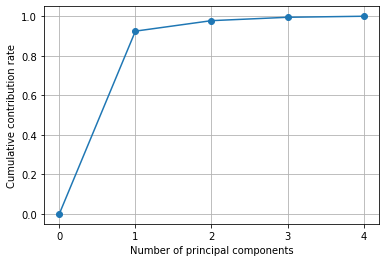

In [55]:
# 累積寄与率の視覚化
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.show()

結果、第二主成分(PC2)までで元のデータの 97% が表現できていることがわかります。


In [57]:
# 各主成分 の固有値
pd.DataFrame(pca.explained_variance_, index=["PC{}".format(x + 1) for x in range(len(df.columns))])

,0
PC1,4.228242
PC2,0.242671
PC3,0.078210
PC4,0.023835


In [58]:
#各主成分の固有ベクトル
pd.DataFrame(pca.components_, columns=df.columns[1:], index=["PC{}".format(x + 1) for x in range(len(df.columns))])

ValueError: Shape of passed values is (4, 4), indices imply (4, 3)